In [3]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from torch.utils.data import DataLoader

from decifer import (
    HDF5Dataset,
    Tokenizer,
)

# Example usage:
tok = Tokenizer()
block_size = 2048  # Transformer context length
dataset = HDF5Dataset('../data/chili100k/occ_debug_max_2000/hdf5/test_dataset.h5', 
                      ['name', 'xrd_cont_x', 'xrd_cont_y', 'xrd_discrete_x', 'xrd_discrete_y', 'xrd_tokenized', 'cif_tokenized', 'cif_content'], block_size)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

Processing datasets:   0%|          | 0/8 [00:00<?, ?it/s]

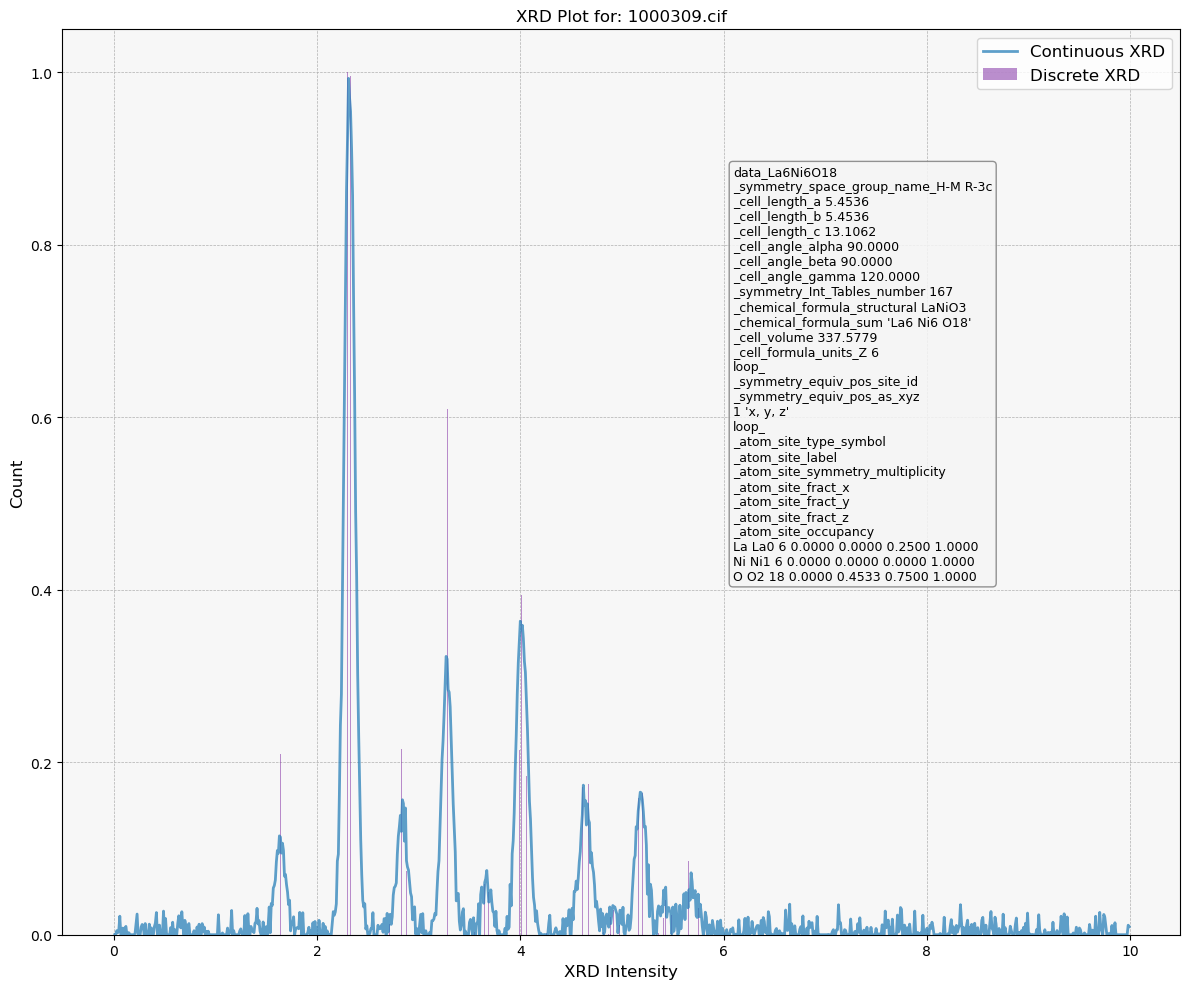

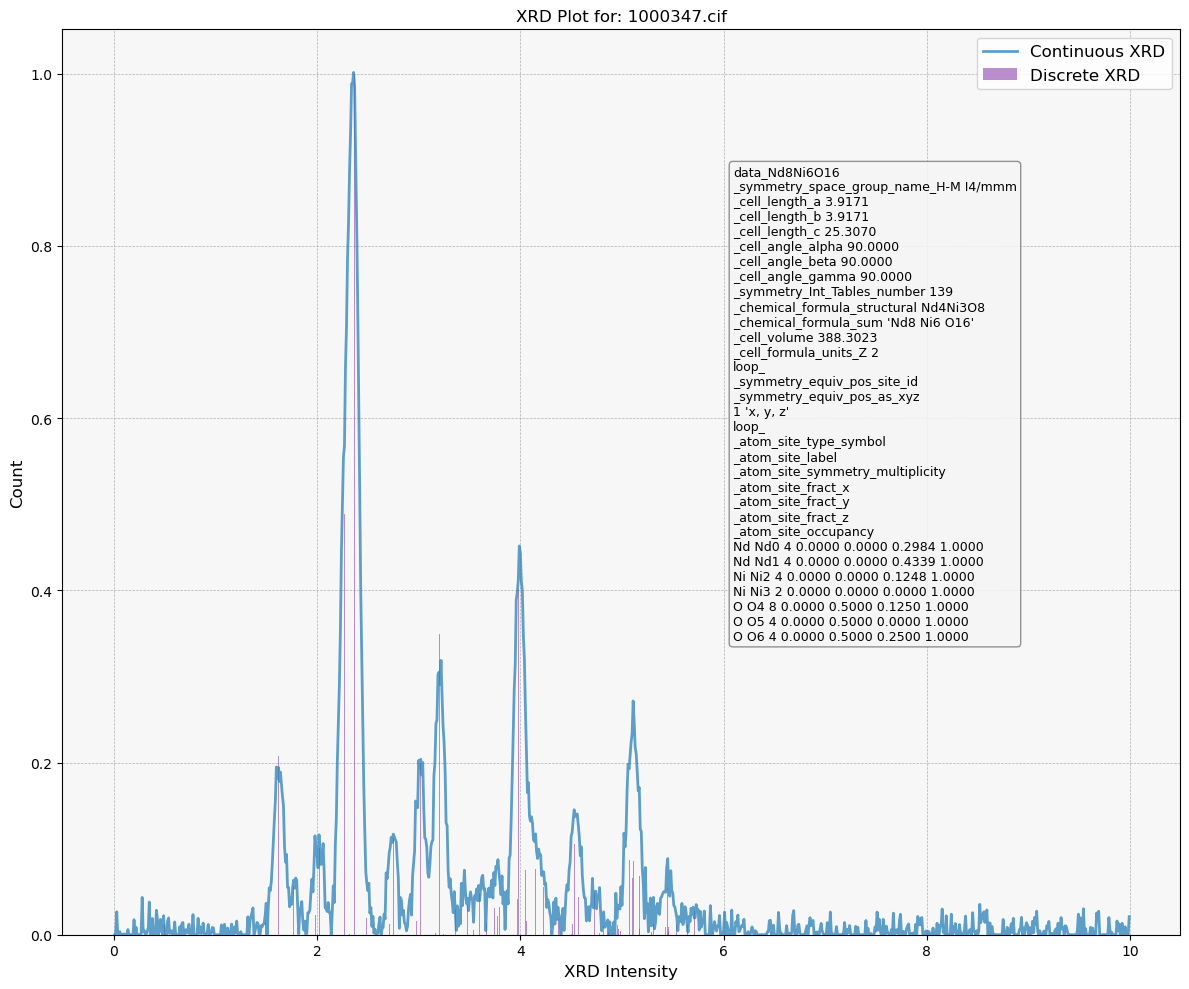

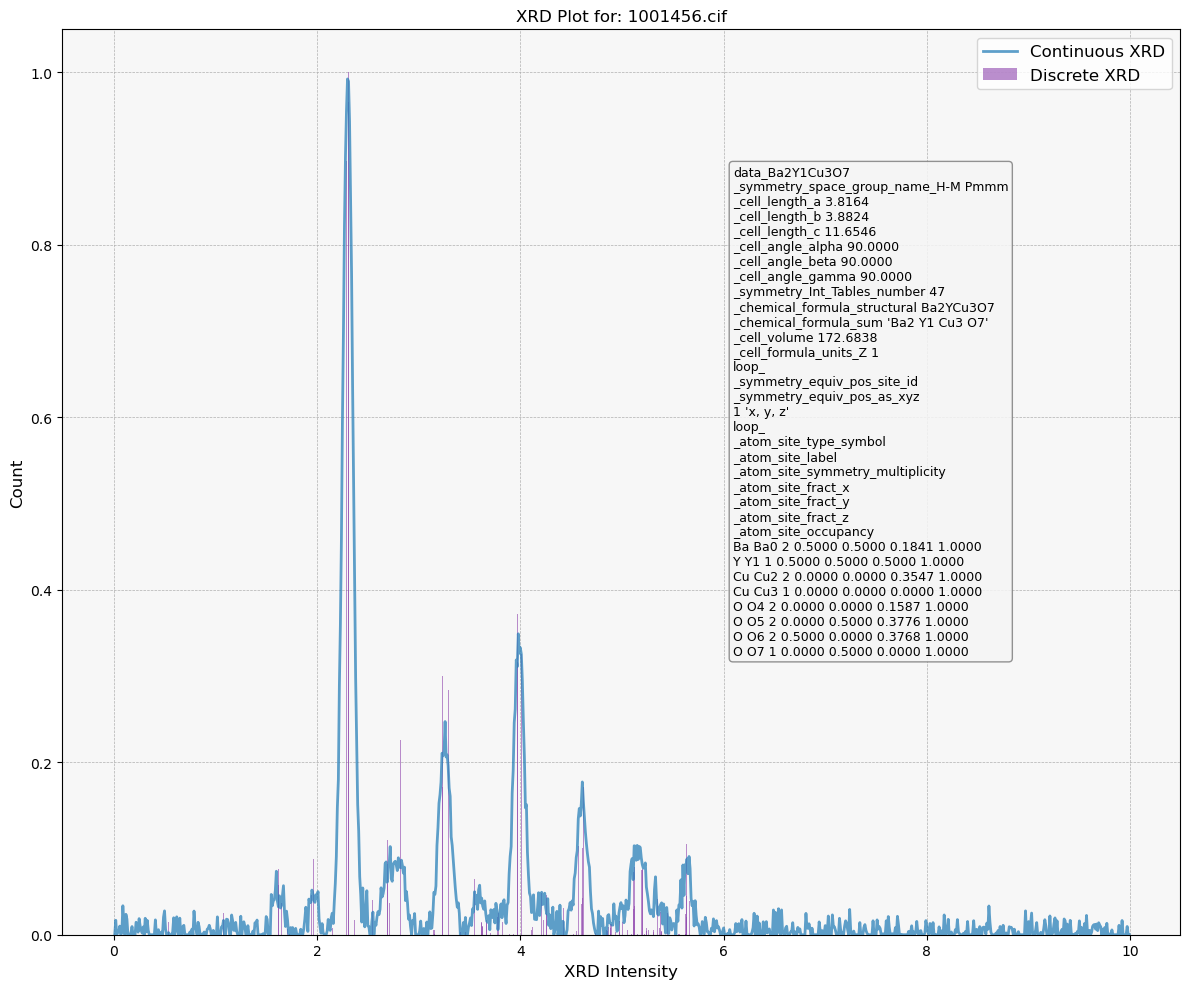

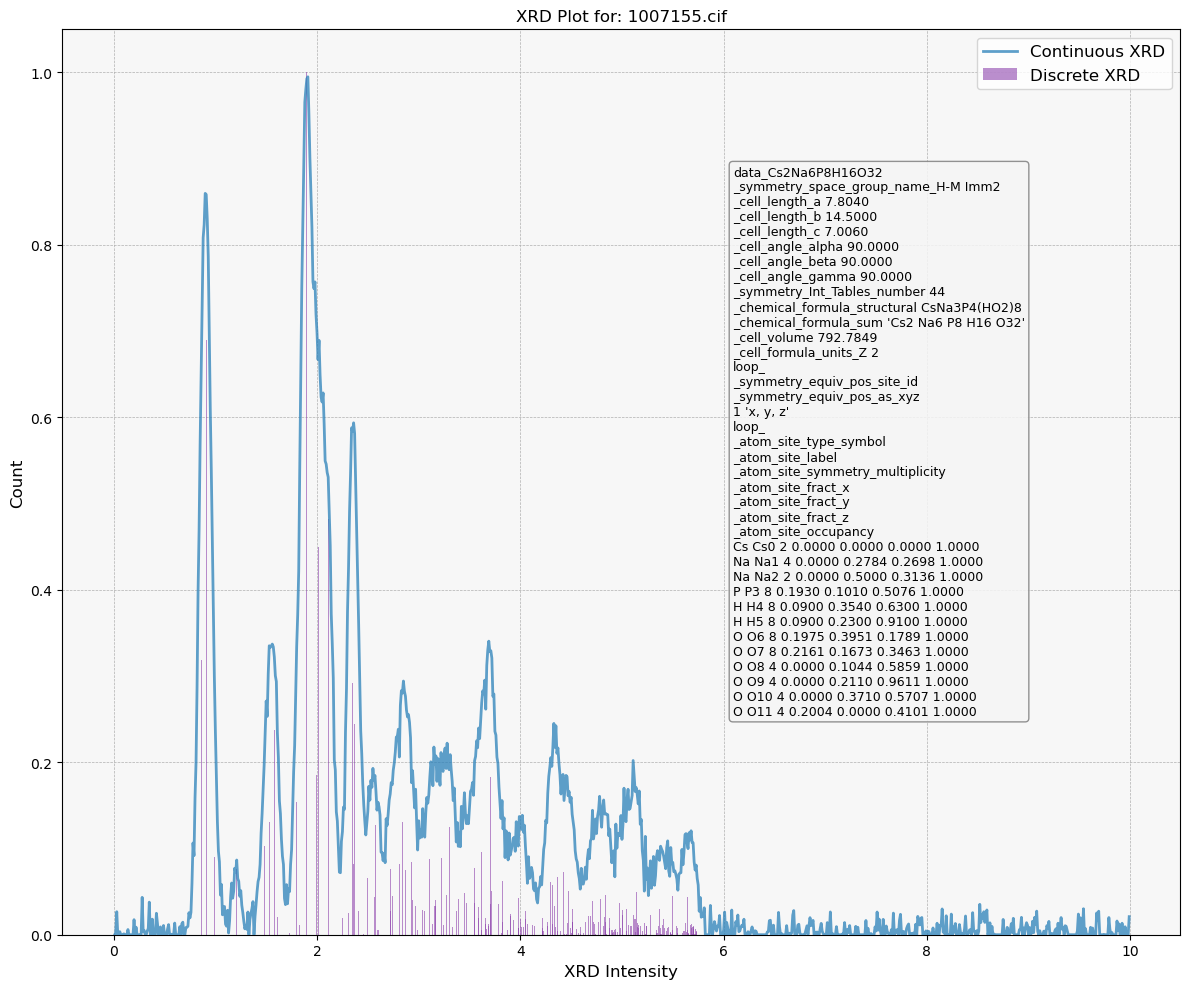

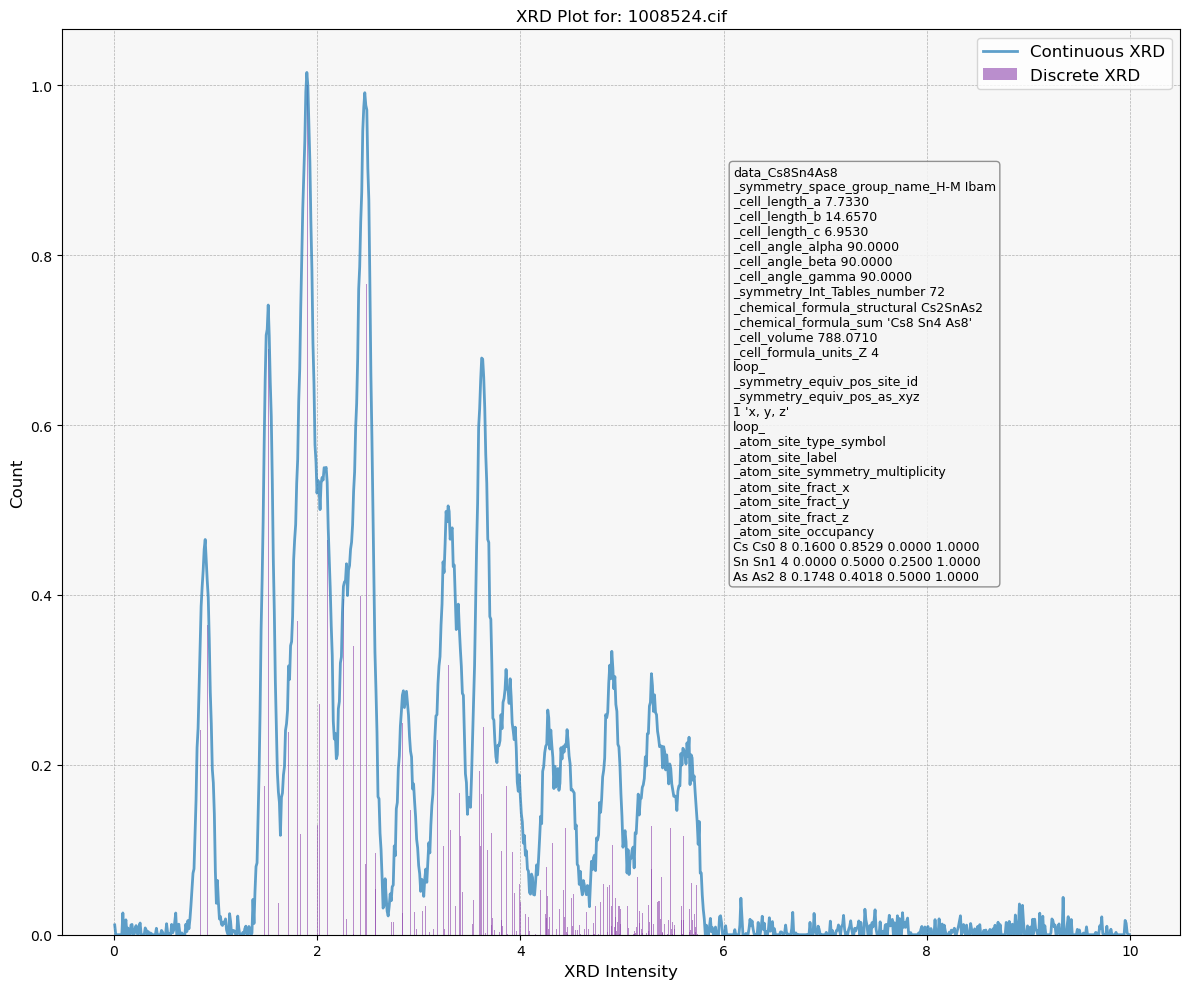

In [4]:
for batch in dataloader:
    for i, (ni, x, y, xd, yd, xrd_tokens, cif_tokens, cif_content) in enumerate(zip(*batch)):
        # Create a figure and axis with a clean style
        plt.figure(figsize=(12, 10))
        plt.title(f"XRD Plot for: {ni}", fontsize=12)

        # Style the plot with fancier colors and design
        plt.bar(xd, yd, width=0.01, color='#8e44ad', alpha=0.6, label='Discrete XRD', zorder=2)
        plt.plot(x[x != 0], y[x != 0], color='#2980b9', linewidth=2, alpha=0.75, label='Continuous XRD', zorder=3)

        # Add grid for better visibility
        plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, zorder=1)

        # Set labels for the axes
        plt.xlabel("XRD Intensity", fontsize=12)
        plt.ylabel("Count", fontsize=12)

        # Add a legend
        plt.legend(loc="upper right", fontsize=12)

        # Decode the tokens and plot them as text boxes
        xrd_tokens = xrd_tokens[xrd_tokens != tok.padding_id]
        decoded_xrd_tokens = tok.decode(list(xrd_tokens.numpy()))
        cif_tokens = cif_tokens[cif_tokens != tok.padding_id]
        decoded_cif_tokens = tok.decode(list(cif_tokens.numpy()))

        # Add the decoded tokens as textboxes
        text_box_props = dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="whitesmoke", alpha=0.85)
        plt.text(0.6, 0.85, decoded_cif_tokens,
                 transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=text_box_props)

        # Enhance plot appearance with background color and styles
        plt.gca().set_facecolor("#f7f7f7")  # Light gray background

        plt.tight_layout()  # Ensure everything fits nicely
        plt.show()
        
        if i > 3:
            break
    break
